In [171]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Load the dataset 
data = pd.read_csv("paris_housing_regression.csv")

# Display basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hasYard            8000 non-null   int64  
 1   hasPool            8000 non-null   int64  
 2   floors             3773 non-null   float64
 3   cityCode           8000 non-null   int64  
 4   cityPartRange      6640 non-null   float64
 5   numPrevOwners      8000 non-null   int64  
 6   isNewBuilt         8000 non-null   int64  
 7   hasStormProtector  8000 non-null   int64  
 8   garage             8000 non-null   int64  
 9   hasStorageRoom     8000 non-null   int64  
 10  hasGuestRoom       6000 non-null   float64
 11  basementarea       8000 non-null   float64
 12  atticarea          8000 non-null   float64
 13  squaremeters       8000 non-null   float64
 14  price              8000 non-null   float64
 15  rooms              8000 non-null   float64
dtypes: float64(8), int64(8)


In [172]:
Housingdata = pd.read_csv("paris_housing_regression.csv")

In [173]:
Housingdata.head()

,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,garage,hasStorageRoom,hasGuestRoom,basementarea,atticarea,squaremeters,price,rooms
0,0,1,2.0,53236,7.0,1,0,0,736,1,2.0,8.731175,9.207336,11.308739,8158198.0,4.060443
1,0,0,79.0,78649,7.0,6,1,1,742,0,3.0,8.685247,8.707648,11.273792,7878473.1,4.488636
2,1,1,NaN,39708,10.0,10,1,1,329,1,NaN,8.418036,7.668094,11.264515,7816750.0,4.276666
3,1,0,NaN,17489,1.0,7,0,1,859,1,8.0,9.030137,7.344073,9.663134,1577602.7,3.258097
4,0,0,95.0,35955,6.0,6,1,1,338,0,5.0,9.180912,8.727292,8.067776,322180.4,4.094345


In [174]:
# Checking for missing values in each column
missing_values = Housingdata.isna().sum()

# Displaying the count of missing values for each column
print(missing_values)


hasYard                 0
hasPool                 0
floors               4227
cityCode                0
cityPartRange        1360
numPrevOwners           0
isNewBuilt              0
hasStormProtector       0
garage                  0
hasStorageRoom          0
hasGuestRoom         2000
basementarea            0
atticarea               0
squaremeters            0
price                   0
rooms                   0
dtype: int64


In [175]:
# Selecting specific columns for skewness check
mv_cols = Housingdata[['floors', 'cityPartRange', 'hasGuestRoom']]

# Calculating skewness for the selected columns
skewness_values = mv_cols.skew()

# Display skewness values
print("Skewness values for selected columns:")
print(skewness_values)


Skewness values for selected columns:
floors           0.009581
cityPartRange   -0.004544
hasGuestRoom     0.021358
dtype: float64


In [176]:
# Selecting specific columns for skewness check
mv_cols = Housingdata[['floors', 'cityPartRange', 'hasGuestRoom']]

# Calculating skewness for the selected columns
skewness_values = mv_cols.skew()

# Display skewness values
print("Skewness values for selected columns:")
print(skewness_values)



Skewness values for selected columns:
floors           0.009581
cityPartRange   -0.004544
hasGuestRoom     0.021358
dtype: float64


In [177]:
# Drop the 'floors' and 'cityCode' columns
Housingdata = Housingdata.drop(columns=['floors', 'cityCode'])

# Display the first few rows to confirm
Housingdata.head()



,hasYard,hasPool,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,garage,hasStorageRoom,hasGuestRoom,basementarea,atticarea,squaremeters,price,rooms
0,0,1,7.0,1,0,0,736,1,2.0,8.731175,9.207336,11.308739,8158198.0,4.060443
1,0,0,7.0,6,1,1,742,0,3.0,8.685247,8.707648,11.273792,7878473.1,4.488636
2,1,1,10.0,10,1,1,329,1,NaN,8.418036,7.668094,11.264515,7816750.0,4.276666
3,1,0,1.0,7,0,1,859,1,8.0,9.030137,7.344073,9.663134,1577602.7,3.258097
4,0,0,6.0,6,1,1,338,0,5.0,9.180912,8.727292,8.067776,322180.4,4.094345


In [178]:
# List of columns with missing values for median imputation
columns_with_missing_values = [col for col in Housingdata.columns if Housingdata[col].isna().sum() > 0]

# Apply median imputation for each column with missing values
for column in columns_with_missing_values:
    median_value = Housingdata[column].median()
    Housingdata[column].fillna(median_value, inplace=True)

# Display the dataset to confirm imputation
Housingdata.head()


/var/folders/3k/vpbyp6v12x97811z_5br1k480000gn/T/ipykernel_85702/21179851.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Housingdata[column].fillna(median_value, inplace=True)


,hasYard,hasPool,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,garage,hasStorageRoom,hasGuestRoom,basementarea,atticarea,squaremeters,price,rooms
0,0,1,7.0,1,0,0,736,1,2.0,8.731175,9.207336,11.308739,8158198.0,4.060443
1,0,0,7.0,6,1,1,742,0,3.0,8.685247,8.707648,11.273792,7878473.1,4.488636
2,1,1,10.0,10,1,1,329,1,5.0,8.418036,7.668094,11.264515,7816750.0,4.276666
3,1,0,1.0,7,0,1,859,1,8.0,9.030137,7.344073,9.663134,1577602.7,3.258097
4,0,0,6.0,6,1,1,338,0,5.0,9.180912,8.727292,8.067776,322180.4,4.094345


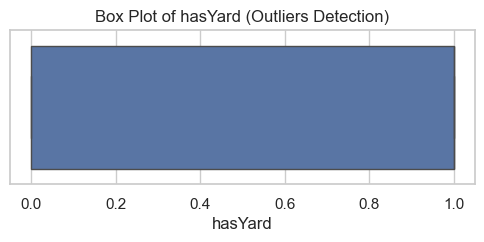

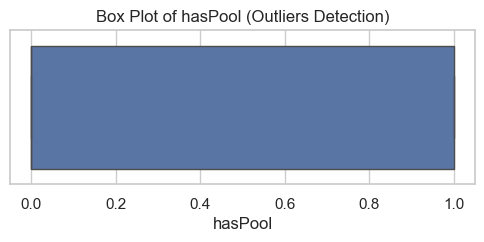

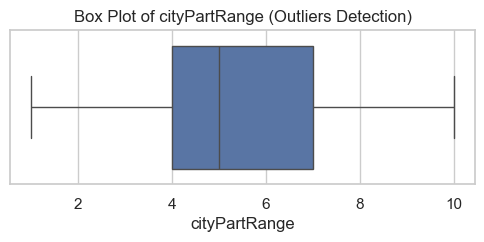

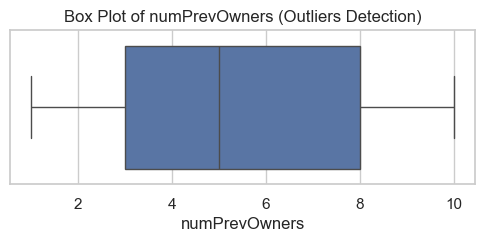

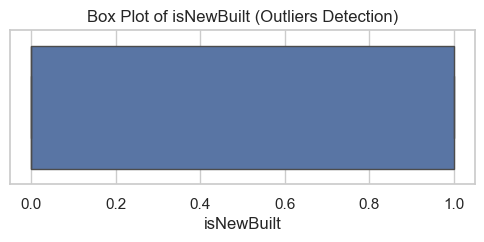

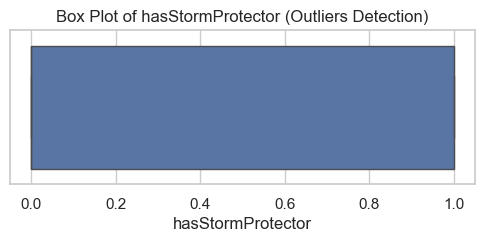

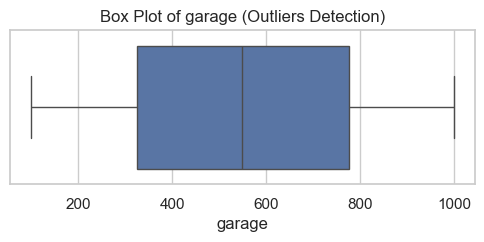

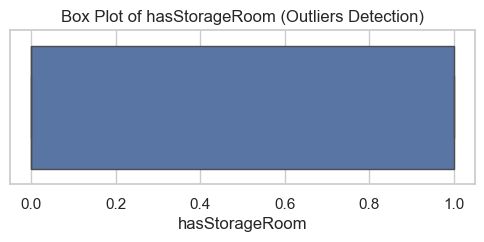

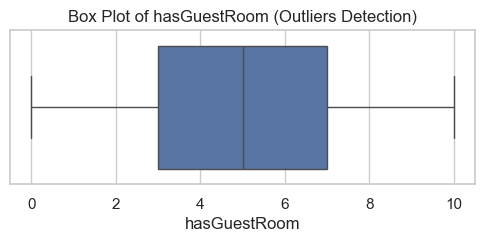

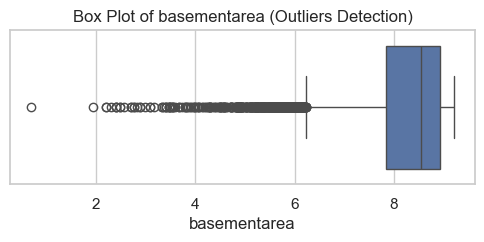

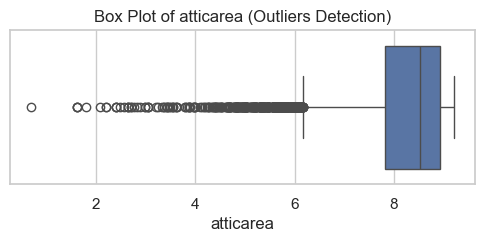

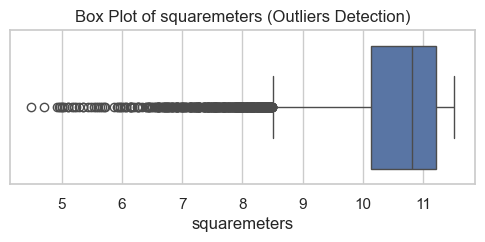

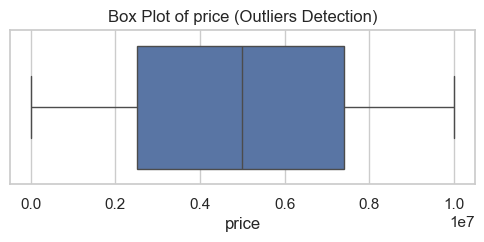

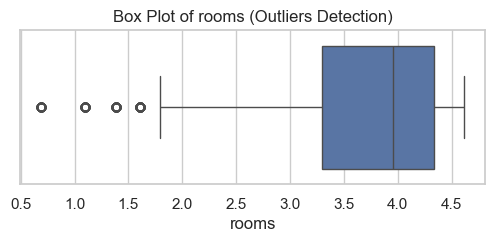

Outliers detected using IQR method:


{'hasYard': Series([], Name: hasYard, dtype: int64),
 'hasPool': Series([], Name: hasPool, dtype: int64),
 'cityPartRange': Series([], Name: cityPartRange, dtype: float64),
 'numPrevOwners': Series([], Name: numPrevOwners, dtype: int64),
 'isNewBuilt': Series([], Name: isNewBuilt, dtype: int64),
 'hasStormProtector': Series([], Name: hasStormProtector, dtype: int64),
 'garage': Series([], Name: garage, dtype: int64),
 'hasStorageRoom': Series([], Name: hasStorageRoom, dtype: int64),
 'hasGuestRoom': Series([], Name: hasGuestRoom, dtype: float64),
 'basementarea': 37      5.953243
 50      6.184149
 78      6.049733
 101     6.154858
 108     4.905275
           ...   
 7924    2.564949
 7929    6.175867
 7939    5.953243
 7941    5.814131
 7976    2.708050
 Name: basementarea, Length: 443, dtype: float64,
 'atticarea': 7       5.293305
 37      4.143135
 48      6.156979
 106     5.631212
 161     5.683580
           ...   
 7899    2.708050
 7912    5.043425
 7915    5.105945
 7919   

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Detecting outliers using the IQR method and visualizing with box plots
def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        
        # Plotting boxplot for each column to visualize outliers
        plt.figure(figsize=(6, 2))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column} (Outliers Detection)')
        plt.xlabel(column)
        plt.show()
    
    return outliers

# Select numeric columns for outlier detection
numeric_columns = Housingdata.select_dtypes(include=[np.number]).columns.tolist()

# Detecting and displaying outliers in each numeric column
outliers_detected = detect_outliers_iqr(Housingdata, numeric_columns)

# Display the dictionary of outliers
print("Outliers detected using IQR method:")
display(outliers_detected)



/var/folders/3k/vpbyp6v12x97811z_5br1k480000gn/T/ipykernel_85702/1966576750.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_storm_protector, x='hasStormProtector', y='price', palette="pastel")


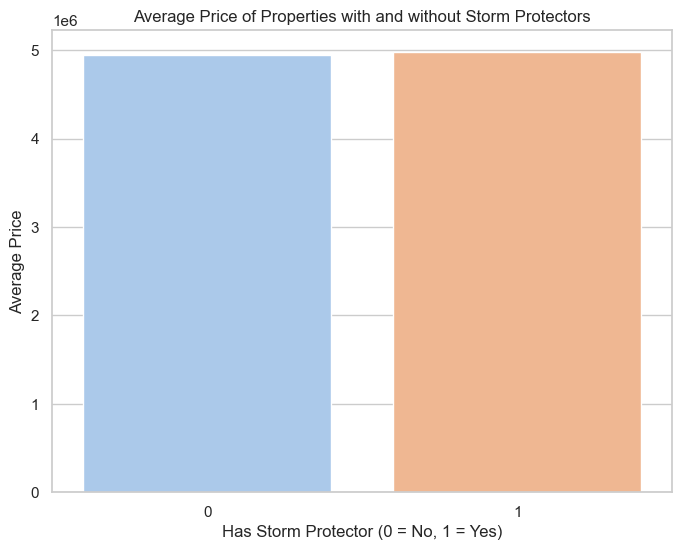

The bar plot shows that properties with storm protectors have a slightly higher average price than those without. This finding suggests that storm protectors may add value to a property due to perceived safety benefits.


In [180]:
# Hypothesis 1: Properties with storm protectors have higher prices
# Group data by 'hasStormProtector' and calculate the average price for each group
avg_price_by_storm_protector = Housingdata.groupby('hasStormProtector')['price'].mean().reset_index()

# Bar plot to visualize the average price for properties with and without storm protectors
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_by_storm_protector, x='hasStormProtector', y='price', palette="pastel")
plt.title("Average Price of Properties with and without Storm Protectors")
plt.xlabel("Has Storm Protector (0 = No, 1 = Yes)")
plt.ylabel("Average Price")
plt.show()

# Interpretation of the plot
print("The bar plot shows that properties with storm protectors have a slightly higher average price than those without. This finding suggests that storm protectors may add value to a property due to perceived safety benefits.")


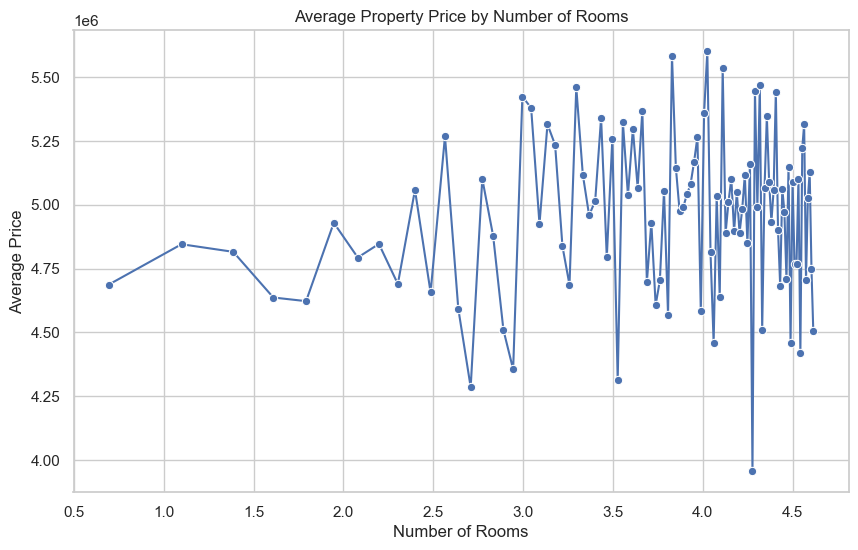

Observation: If the trend line shows that properties with more rooms have higher prices, this supports the hypothesis that additional rooms add value.


In [181]:
# Hypothesis 2: Properties with more rooms have higher prices
# Group data by 'rooms' and calculate the average price for each group
avg_price_by_rooms = Housingdata.groupby('rooms')['price'].mean().reset_index()

# Plotting the relationship between the number of rooms and the average price using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_rooms, x='rooms', y='price', marker='o', color='b')
plt.title("Average Property Price by Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

print("Observation: If the trend line shows that properties with more rooms have higher prices, this supports the hypothesis that additional rooms add value.")


Correlation Matrix:
                    hasYard   hasPool  cityPartRange  numPrevOwners  \
hasYard            1.000000  0.015096       0.014446      -0.003140   
hasPool            0.015096  1.000000       0.025865       0.000561   
cityPartRange      0.014446  0.025865       1.000000       0.012176   
numPrevOwners     -0.003140  0.000561       0.012176       1.000000   
isNewBuilt        -0.010175  0.006716       0.002138      -0.020549   
hasStormProtector -0.004979 -0.002510       0.007175       0.004028   
garage            -0.009142  0.002557      -0.002370       0.019861   
hasStorageRoom    -0.015248 -0.001252      -0.017603       0.025997   
hasGuestRoom      -0.005964  0.007124      -0.020722      -0.018383   
basementarea      -0.003421 -0.001581      -0.002725      -0.000092   
atticarea         -0.008020 -0.007220       0.000386      -0.002838   
squaremeters       0.005821 -0.012903       0.006194       0.023450   
price              0.004892 -0.017144       0.012178     

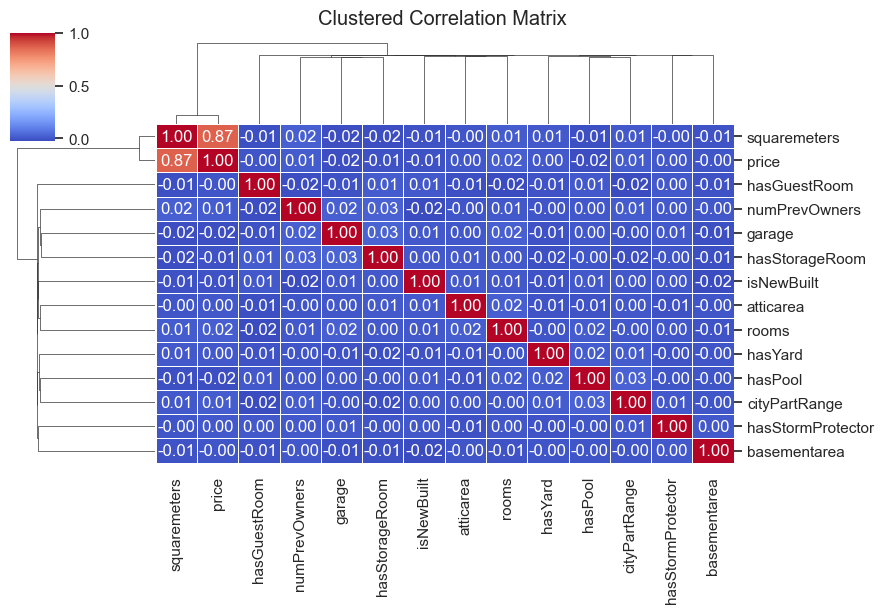

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix
correlation_matrix = Housingdata.corr()

# Step 2: Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 3: Visualize the correlation matrix as a clustered heatmap
sns.clustermap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, figsize=(9, 6))
plt.suptitle("Clustered Correlation Matrix", y=1.02)
plt.show()


In [183]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select relevant features (exclude 'price' since it's the target variable)
X = Housingdata[['squaremeters', 'rooms', 'numPrevOwners', 'cityPartRange', 'hasYard', 
                 'hasStormProtector', 'basementarea', 'atticarea', 'hasGuestRoom', 
                 'isNewBuilt', 'hasStorageRoom', 'hasPool', 'garage']]

# Calculate VIF for each feature without adding a constant
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


              Feature        VIF
0        squaremeters  68.097452
1               rooms  18.836655
2       numPrevOwners   4.684383
3       cityPartRange   5.234566
4             hasYard   2.023060
5   hasStormProtector   1.990656
6        basementarea  50.694754
7           atticarea  51.601105
8        hasGuestRoom   4.242290
9          isNewBuilt   1.982093
10     hasStorageRoom   1.996923
11            hasPool   1.982438
12             garage   5.324208


In [184]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select relevant features (exclude 'price' since it's the target variable)
X = Housingdata[['squaremeters', 'cityPartRange', 'hasYard', 
                 'hasStormProtector', 'isNewBuilt', 'hasStorageRoom', 'hasPool']]

# Calculate VIF for each feature without adding a constant
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


             Feature       VIF
0       squaremeters  9.379413
1      cityPartRange  5.136691
2            hasYard  2.016206
3  hasStormProtector  1.980765
4         isNewBuilt  1.970158
5     hasStorageRoom  1.976288
6            hasPool  1.970890


In [185]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select relevant features (exclude 'price' since it's the target variable)
features = ['squaremeters', 'rooms', 'numPrevOwners', 'cityPartRange', 'hasYard', 
            'hasStormProtector', 'basementarea', 'atticarea', 'hasGuestRoom', 
            'isNewBuilt', 'hasStorageRoom', 'hasPool', 'garage']
X = Housingdata[features]

# Step 1: Check the correlation between features
correlation_matrix = X.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Step 2: Remove highly correlated features (correlation > 0.9)
# We will remove one of the features from each pair of highly correlated variables
threshold = 0.9
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

# Remove the highly correlated features
X = X.drop(columns=high_corr_features)

# Step 3: Calculate VIF for each remaining feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print("\nVariance Inflation Factor (VIF) values for selected features:")
print(vif_data)


Correlation Matrix:
                   squaremeters     rooms  numPrevOwners  cityPartRange  \
squaremeters           1.000000  0.012949       0.023450       0.006194   
rooms                  0.012949  1.000000       0.005252      -0.000061   
numPrevOwners          0.023450  0.005252       1.000000       0.012176   
cityPartRange          0.006194 -0.000061       0.012176       1.000000   
hasYard                0.005821 -0.003587      -0.003140       0.014446   
hasStormProtector     -0.000846  0.003410       0.004028       0.007175   
basementarea          -0.006702 -0.008211      -0.000092      -0.002725   
atticarea             -0.001688  0.018005      -0.002838       0.000386   
hasGuestRoom          -0.013138 -0.024234      -0.018383      -0.020722   
isNewBuilt            -0.011470  0.006331      -0.020549       0.002138   
hasStorageRoom        -0.017520  0.004781       0.025997      -0.017603   
hasPool               -0.012903  0.015048       0.000561       0.025865   
garag

In [186]:
# Select relevant features (exclude 'price' since it's the target variable)
features = ['squaremeters', 'cityPartRange', 'hasYard', 'hasStormProtector', 
            'isNewBuilt', 'hasStorageRoom', 'hasPool']
X = Housingdata[features]

 #Calculate VIF for each feature after scaling
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display VIF values
print("Variance Inflation Factor (VIF) for selected features:")
print(vif_data)

Variance Inflation Factor (VIF) for selected features:
             Feature       VIF
0       squaremeters  1.000673
1      cityPartRange  1.001265
2            hasYard  1.000812
3  hasStormProtector  1.000091
4         isNewBuilt  1.000311
5     hasStorageRoom  1.000860
6            hasPool  1.001112


The AIC of the model on the training set is: 199481.75498818618
Estimated AIC on the test set: 45276.618058701555
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     2799.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -99733.
No. Observations:                6400   AIC:                         1.995e+05
Df Residuals:                    6392   BIC:                         1.995e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------

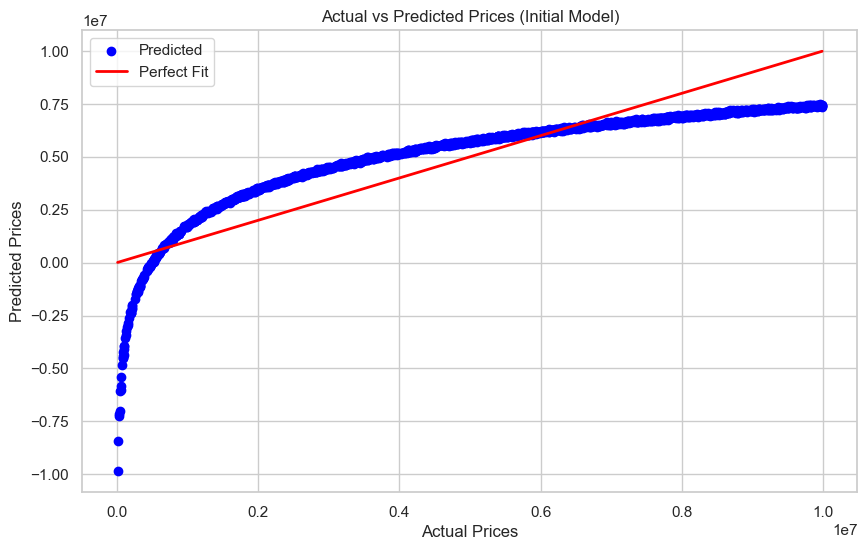

In [187]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'Housingdata' is your DataFrame and 'price' is the target variable
# Replace this with your actual data loading step
# Housingdata = pd.read_csv('path_to_your_data.csv')

# Select relevant features for the regression model
X = Housingdata[['squaremeters', 'cityPartRange', 'hasYard', 
                 'hasStormProtector', 'isNewBuilt', 'hasStorageRoom', 'hasPool']]
y = Housingdata['price']

# Split data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the features, as statsmodels does not include it by default
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the linear regression model using statsmodels on the training data
model = sm.OLS(y_train, X_train).fit()

# Print the AIC value of the model on the training set
print(f"The AIC of the model on the training set is: {model.aic}")

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals (Actual - Predicted)
residuals = y_test - y_pred

# Calculate SSE (Sum of Squared Errors)
sse = sum(residuals**2)

# AIC formula for linear regression: n * ln(SSE/n) + 2*k
# where n is the number of observations and k is the number of parameters
n = len(y_test)
k = X_test.shape[1]
aic_test = n * np.log(sse / n) + 2 * k

print(f"Estimated AIC on the test set: {aic_test}")

# Display the summary of the model, including AIC and other statistical details
print(model.summary())

# Visualization: Actual vs Predicted values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')  # Line of best fit
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Initial Model)')
plt.legend()
plt.grid(True)
plt.show()


Stepwise AIC on the training set: 199473.89612213476
Estimated AIC on the test set for stepwise model: 45262.520006306506

Stepwise Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                 1.959e+04
Date:                Sun, 10 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:11:43   Log-Likelihood:                -99735.
No. Observations:                6400   AIC:                         1.995e+05
Df Residuals:                    6398   BIC:                         1.995e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [

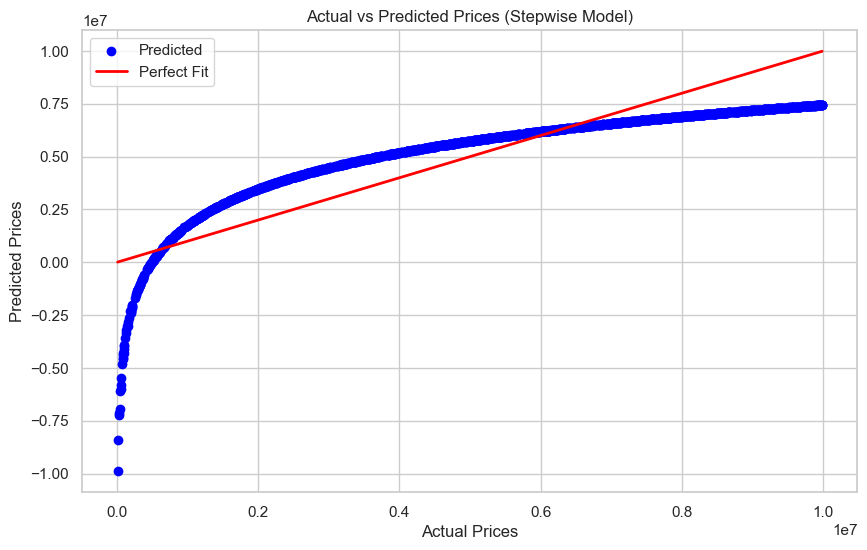

In [188]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'Housingdata' is your DataFrame and 'price' is the target variable
# Housingdata = pd.read_csv('path_to_your_data.csv')

# Select relevant features
X = Housingdata[['squaremeters', 'cityPartRange', 'hasYard', 
                 'hasStormProtector', 'isNewBuilt', 'hasStorageRoom', 'hasPool']]
y = Housingdata['price']

# Split data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant (intercept) to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Stepwise Selection based on AIC and p-values
def stepwise_selection(x, y, threshold_in=0.05, threshold_out=0.10):
    initial_features = x.columns.tolist()
    selected_features = []
    
    # Forward Stepwise Selection
    while len(initial_features) > 0:
        aic_with_feature = {}
        
        for feature in initial_features:
            selected_features_temp = selected_features + [feature]
            X_temp = sm.add_constant(x[selected_features_temp])
            model_temp = sm.OLS(y, X_temp).fit()
            aic_with_feature[feature] = model_temp.aic
        
        # Select the feature with the lowest AIC
        best_feature = min(aic_with_feature, key=aic_with_feature.get)
        best_aic = aic_with_feature[best_feature]
        
        # Fit model with this feature and check p-value
        selected_features_temp = selected_features + [best_feature]
        X_temp = sm.add_constant(x[selected_features_temp])
        model_temp = sm.OLS(y, X_temp).fit()
        
        # Check if p-value of the selected feature is less than threshold_in (Enter Rule)
        if model_temp.pvalues[best_feature] < threshold_in:
            selected_features.append(best_feature)
            initial_features.remove(best_feature)
        else:
            break
        
        # Perform backward elimination on the selected features (Remove feature if p-value > threshold_out)
        while len(selected_features) > 0:
            X_temp = sm.add_constant(x[selected_features])
            model_temp = sm.OLS(y, X_temp).fit()
            pvalues = model_temp.pvalues.iloc[1:]  # Ignore intercept
            max_pvalue = pvalues.max()
            
            if max_pvalue > threshold_out:
                excluded_feature = pvalues.idxmax()
                selected_features.remove(excluded_feature)
            else:
                break
    
    return selected_features

# Perform stepwise selection on the training data
selected_features_stepwise = stepwise_selection(X_train, y_train)

# Refit model with selected features from stepwise selection
X_train_selected = sm.add_constant(X_train[selected_features_stepwise])
X_test_selected = sm.add_constant(X_test[selected_features_stepwise])

finalmodel_stepwise = sm.OLS(y_train, X_train_selected).fit()

# Predictions on test set for stepwise model
y_pred_stepwise = finalmodel_stepwise.predict(X_test_selected)

# Calculate residuals for stepwise model
residuals_stepwise = y_test - y_pred_stepwise

# Calculate SSE for stepwise model
sse_stepwise = sum(residuals_stepwise**2)

# AIC formula for linear regression: n * ln(SSE/n) + 2*k
n_stepwise = len(y_test)
k_stepwise = X_test_selected.shape[1]
aic_test_stepwise = n_stepwise * np.log(sse_stepwise/n_stepwise) + 2 * k_stepwise

# Print the AIC value of the stepwise model and estimated AIC for the test set
print(f"Stepwise AIC on the training set: {finalmodel_stepwise.aic}")
print(f"Estimated AIC on the test set for stepwise model: {aic_test_stepwise}")

# Display the summary of the stepwise model
print("\nStepwise Model Summary:")
print(finalmodel_stepwise.summary())

# Visualization: Actual vs Predicted values on test set for the stepwise model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stepwise, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')  # Line of best fit
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Stepwise Model)')
plt.legend()
plt.grid(True)
plt.show()
